In [316]:
import pandas as pd
import numpy as np
income_data = pd.read_csv("./income_evaluation.csv")
print(income_data.shape)
income_data.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [317]:
income_data.columns.values

array(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week',
       ' native-country', ' income'], dtype=object)

In [318]:
income_data[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

In [319]:
train_data = income_data[0:27561].copy()
print(train_data.shape)

(27561, 15)


In [320]:
test_data = income_data[27561:].copy()
test_target = test_data[' income']
test_data = test_data.drop(columns = [' income'])
print(test_data.shape)

(5000, 14)


In [321]:
train_data.dtypes.value_counts()

object    9
int64     6
dtype: int64

In [322]:
train_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

 workclass          9
 education         16
 marital-status     7
 occupation        15
 relationship       6
 race               5
 sex                2
 native-country    42
 income             2
dtype: int64

In [323]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [324]:
missing_values = missing_values_table(income_data)

income_data = income_data.replace(' ?', np.nan)
missing_values = missing_values_table(income_data)
print(missing_values)

train_data = train_data.replace(' ?', np.nan)
missing_values_train = missing_values_table(train_data)
print(missing_values_train)

test_data = test_data.replace(' ?', np.nan)
missing_values_test = missing_values_table(test_data)
print(missing_values_test)

for col in missing_values.index:
    most_frequent_vaule = income_data[col].value_counts().index[0]
    print(most_frequent_vaule)
    train_data[col] = train_data[col].replace(np.nan, most_frequent_vaule)
    test_data[col] = test_data[col].replace(np.nan, most_frequent_vaule)

train_data.head()

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.
Your selected dataframe has 15 columns.
There are 3 columns that have missing values.
                 Missing values  % of Total Values
 occupation                1843                5.7
 workclass                 1836                5.6
 native-country             583                1.8
Your selected dataframe has 15 columns.
There are 3 columns that have missing values.
                 Missing values  % of Total Values
 occupation                1546                5.6
 workclass                 1541                5.6
 native-country             494                1.8
Your selected dataframe has 14 columns.
There are 3 columns that have missing values.
                 Missing values  % of Total Values
 occupation                 297                5.9
 workclass                  295                5.9
 native-country              89                1.8
 Prof-specialty
 Private
 United-States


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [325]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count_train = 0
le_count_test = 0
for col in train_data:
    if train_data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_data[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_data[col])
            train_data[col] = le.transform(train_data[col])            
            # Keep track of how many columns were label encoded
            le_count_train += 1

for col in test_data:
    if test_data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(test_data[col].unique())) <= 2:
            # Train on the training data
            le.fit(test_data[col])
            test_data[col] = le.transform(test_data[col])            
            # Keep track of how many columns were label encoded
            le_count_test += 1

print('%d columns of train data were label encoded.' % le_count_train)
print('%d columns of test data were label encoded.' % le_count_test)

train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)
print(train_data.shape)
print(test_data.shape)

le.fit(test_target)
test_target = le.transform(test_target) 
test_target

2 columns of train data were label encoded.
1 columns of test data were label encoded.
(27561, 105)
(5000, 103)


array([0, 0, 0, ..., 0, 0, 1])

In [326]:
train_data.columns.values

array(['age', ' fnlwgt', ' education-num', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' income',
       ' workclass_ Federal-gov', ' workclass_ Local-gov',
       ' workclass_ Never-worked', ' workclass_ Private',
       ' workclass_ Self-emp-inc', ' workclass_ Self-emp-not-inc',
       ' workclass_ State-gov', ' workclass_ Without-pay',
       ' education_ 10th', ' education_ 11th', ' education_ 12th',
       ' education_ 1st-4th', ' education_ 5th-6th',
       ' education_ 7th-8th', ' education_ 9th', ' education_ Assoc-acdm',
       ' education_ Assoc-voc', ' education_ Bachelors',
       ' education_ Doctorate', ' education_ HS-grad',
       ' education_ Masters', ' education_ Preschool',
       ' education_ Prof-school', ' education_ Some-college',
       ' marital-status_ Divorced', ' marital-status_ Married-AF-spouse',
       ' marital-status_ Married-civ-spouse',
       ' marital-status_ Married-spouse-absent',
       ' marital-status_ Never-married', '

In [327]:
test_data.columns.values

array(['age', ' fnlwgt', ' education-num', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' workclass_ Federal-gov',
       ' workclass_ Local-gov', ' workclass_ Never-worked',
       ' workclass_ Private', ' workclass_ Self-emp-inc',
       ' workclass_ Self-emp-not-inc', ' workclass_ State-gov',
       ' workclass_ Without-pay', ' education_ 10th', ' education_ 11th',
       ' education_ 12th', ' education_ 1st-4th', ' education_ 5th-6th',
       ' education_ 7th-8th', ' education_ 9th', ' education_ Assoc-acdm',
       ' education_ Assoc-voc', ' education_ Bachelors',
       ' education_ Doctorate', ' education_ HS-grad',
       ' education_ Masters', ' education_ Preschool',
       ' education_ Prof-school', ' education_ Some-college',
       ' marital-status_ Divorced', ' marital-status_ Married-AF-spouse',
       ' marital-status_ Married-civ-spouse',
       ' marital-status_ Married-spouse-absent',
       ' marital-status_ Never-married', ' marital-status_ S

In [328]:
train_labels = train_data[' income']

# Align the training and testing data, keep only columns present in both dataframes
train_data, test_data = train_data.align(test_data, join = 'inner', axis = 1)

# Add the target back in
train_data[' income'] = train_labels

print('Training Features shape: ', train_data.shape)
print('Testing Features shape: ', test_data.shape)

Training Features shape:  (27561, 104)
Testing Features shape:  (5000, 103)


In [329]:
train_data['age'].describe()

count    27561.000000
mean        38.602772
std         13.669050
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [330]:
train_data[' hours-per-week'].describe()

count    27561.000000
mean        40.403432
std         12.292784
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name:  hours-per-week, dtype: float64

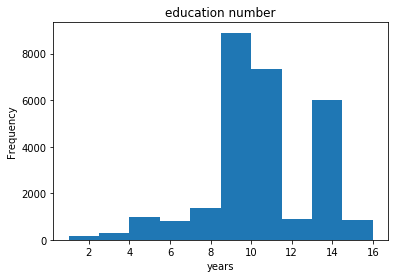

In [331]:
import matplotlib.pyplot as plt

train_data[' education-num'].plot.hist(title = 'education number');
plt.xlabel('years');

In [332]:
# Find correlations with the target and sort
correlations = train_data.corr()[' income'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 age                                    0.231889
 education-num                         0.333187
 relationship_ Husband                 0.399528
 marital-status_ Married-civ-spouse    0.444944
 income                                1.000000
Name:  income, dtype: float64

Most Negative Correlations:
  marital-status_ Never-married   -0.314823
 relationship_ Own-child         -0.227699
 relationship_ Not-in-family     -0.187560
 occupation_ Other-service       -0.156060
 relationship_ Unmarried         -0.144675
Name:  income, dtype: float64


In [117]:
import seaborn as sns
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_data.loc[train_data[' income'] == 0, ' education-num'], label = 'income <= 50K')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_data.loc[train_data[' income'] == 1, ' education-num'], label = 'income > 50K')

# Labeling of plot
plt.xlabel('years'); plt.ylabel('Density'); plt.title('Distribution of education');

ModuleNotFoundError: No module named 'seaborn'

In [333]:
# Extract the EXT_SOURCE variables and show correlations
sample_data = train_data[[' income', 'age', ' education-num', ' relationship_ Husband', ' marital-status_ Married-civ-spouse']]
sample_data_corrs = sample_data.corr()
sample_data_corrs

,income,age,education-num,relationship_ Husband,marital-status_ Married-civ-spouse
income,1.000000,0.231889,0.333187,0.399528,0.444944
age,0.231889,1.000000,0.038084,0.312339,0.311418
education-num,0.333187,0.038084,1.000000,0.077166,0.085189
relationship_ Husband,0.399528,0.312339,0.077166,1.000000,0.892794
marital-status_ Married-civ-spouse,0.444944,0.311418,0.085189,0.892794,1.000000


In [334]:
from sklearn.preprocessing import MinMaxScaler

# Drop the target from the training data
train = train_data.drop(columns = [' income', ' fnlwgt'])
test_fnlwgt = test_data[' fnlwgt']
test = test_data.drop(columns = [' fnlwgt'])
# Feature names
features = list(train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (27561, 102)
Testing data shape:  (5000, 102)


In [335]:
from sklearn.linear_model import LogisticRegression
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 1)

# Train on the training data
log_reg.fit(train, train_labels)

log_reg_pred = log_reg.predict_proba(test)[:, 1]
# Submission dataframe
submit = test_data[[' fnlwgt']]
submit[' income'] = log_reg_pred
 

submit.head(10)


,fnlwgt,income
27561,171199,0.006338
27562,198270,0.069676
27563,131310,0.021229
27564,79923,0.213776
27565,475322,0.101045
27566,134286,0.601042
27567,73746,0.537997
27568,125525,0.036847
27569,155676,0.024580
27570,304949,0.002748


In [336]:
print(len(submit[submit[' income'] > 0.5]))
print(np.sum(test_target == 1))

log_reg.score(test,test_target)

1018
1236


0.8464

In [337]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

print(roc_auc_score(test_target, log_reg_pred))

pred_target = log_reg_pred.copy()

pred_target[pred_target > 0.5] = 1
pred_target[pred_target < 0.5] = 0

print(accuracy_score(test_target, pred_target))
print(precision_score(test_target, pred_target))
print(recall_score(test_target, pred_target))
print(f1_score(test_target, pred_target))

print("\n")
print("Accuracy: %s%%" % (100*accuracy_score(test_target, pred_target)))
print(confusion_matrix(test_target, pred_target))
print(classification_report(test_target, pred_target))

0.9053563567643044
0.8464
0.7298624754420432
0.6011326860841424
0.6592724046140196


Accuracy: 84.64%
[[3489  275]
 [ 493  743]]
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      3764
          1       0.73      0.60      0.66      1236

avg / total       0.84      0.85      0.84      5000



In [338]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50)

# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

# Make a submission dataframe
# Submission dataframe
submit = test_data[[' fnlwgt']]
submit[' income'] = predictions

submit.head(10)



,fnlwgt,income
27561,171199,0.000000
27562,198270,0.030000
27563,131310,0.010000
27564,79923,0.203083
27565,475322,0.250000
27566,134286,0.897955
27567,73746,0.282500
27568,125525,0.000000
27569,155676,0.000000
27570,304949,0.000000


In [339]:
print(roc_auc_score(test_target, predictions))
pred_target = predictions.copy()
pred_target[pred_target >= 0.5] = 1
pred_target[pred_target < 0.5] = 0
print(accuracy_score(test_target, pred_target))
print(precision_score(test_target, pred_target))
print(recall_score(test_target, pred_target))
print(f1_score(test_target, pred_target))

print('\n')


print("Accuracy: %s%%" % (100*accuracy_score(test_target, pred_target)))
print(confusion_matrix(test_target, pred_target))
print(classification_report(test_target, pred_target))

0.893570905942518
0.8456
0.7109090909090909
0.6326860841423948
0.6695205479452054


Accuracy: 84.56%
[[3446  318]
 [ 454  782]]
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      3764
          1       0.71      0.63      0.67      1236

avg / total       0.84      0.85      0.84      5000



In [340]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

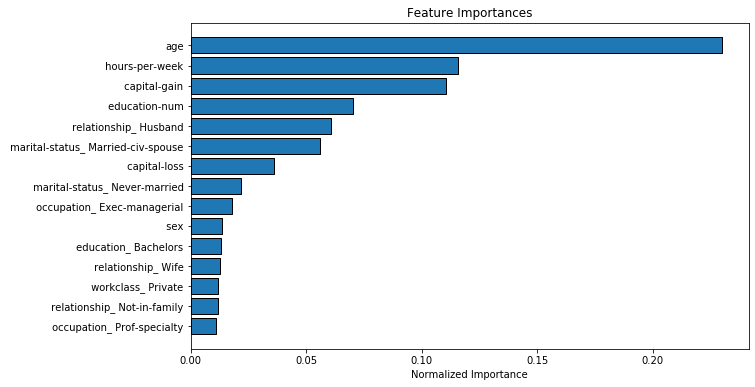

In [341]:
feature_importances_sorted = plot_feature_importances(feature_importances)

In [342]:
train_data.shape

(27561, 104)

In [343]:
train_data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [344]:
# Make a new dataframe for polynomial features
poly_features = train_data[['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week',' income']]
poly_features_test = test_data[[ 'age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']]

poly_target = poly_features[' income']

poly_features = poly_features.drop(columns = [' income'])

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 2)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']))

# Add in the target
poly_features[' income'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()[' income'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))
print(poly_features.shape)
poly_features.head()
#poly_features.ix[27550:27560,0:18]


Polynomial Features shape:  (27561, 21)
 capital-gain^2                  0.141719
 capital-loss^2                  0.146569
 capital-loss                    0.147071
age  capital-loss                0.153338
 capital-loss  hours-per-week    0.157076
 education-num  capital-loss     0.166372
age^2                            0.185694
 hours-per-week^2                0.206323
 capital-gain  hours-per-week    0.212442
 education-num  capital-gain     0.216131
Name:  income, dtype: float64
 education-num  hours-per-week    0.369744
age  education-num                0.389540
 income                           1.000000
1                                      NaN
 capital-gain  capital-loss            NaN
Name:  income, dtype: float64
(27561, 22)


,1,age,education-num,capital-gain,capital-loss,hours-per-week,age^2,age education-num,age capital-gain,age capital-loss,...,education-num capital-gain,education-num capital-loss,education-num hours-per-week,capital-gain^2,capital-gain capital-loss,capital-gain hours-per-week,capital-loss^2,capital-loss hours-per-week,hours-per-week^2,income
0,1.0,39.0,13.0,2174.0,0.0,40.0,1521.0,507.0,84786.0,0.0,...,28262.0,0.0,520.0,4726276.0,0.0,86960.0,0.0,0.0,1600.0,0
1,1.0,50.0,13.0,0.0,0.0,13.0,2500.0,650.0,0.0,0.0,...,0.0,0.0,169.0,0.0,0.0,0.0,0.0,0.0,169.0,0
2,1.0,38.0,9.0,0.0,0.0,40.0,1444.0,342.0,0.0,0.0,...,0.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0,1600.0,0
3,1.0,53.0,7.0,0.0,0.0,40.0,2809.0,371.0,0.0,0.0,...,0.0,0.0,280.0,0.0,0.0,0.0,0.0,0.0,1600.0,0
4,1.0,28.0,13.0,0.0,0.0,40.0,784.0,364.0,0.0,0.0,...,0.0,0.0,520.0,0.0,0.0,0.0,0.0,0.0,1600.0,0


In [345]:
# Merge polynomial features into training dataframe
#poly_features[' fnlwgt'] = train_data[' fnlwgt']
poly_features = poly_features.drop(columns = ['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week',' income'])
#train_data_poly = train_data.merge(poly_features, on = ['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week'], how = 'left',left_index=True, right_index=True)
train_data_poly = pd.concat([train_data,poly_features],axis=1)
print(train_data_poly.shape)
# Merge polnomial features into testing dataframe
#poly_features_test[' fnlwgt'] = test_fnlwgt
#print(poly_features_test.head(10))
#print(poly_features_test.ix[0:10,0:18])
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']))
test_data.index = [i for i in range(5000)]
poly_features_test = poly_features_test.drop(columns = ['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week'])
test_data_poly = pd.concat([test_data,poly_features_test],axis=1)
#print(test_data.ix[27561:27566,0:18])
#test_data_poly = test_data.merge(poly_features_test, on = ['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week'], how = 'left',left_index=True, right_index=True)
print(test_data_poly.shape)
print(test_data_poly.head())
# Align the dataframes
train_data_poly, test_data_poly = train_data_poly.align(test_data_poly, join = 'inner', axis = 1)

train_data_poly[' income'] = train_labels
#a=train_data.merge(poly_features, how = 'left', on = ['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week',' income',' fnlwgt'], left_index=True,right_index=True)

# Print out the new shapes
#print('Training data shape: ', a.shape)
print('Training data shape: ', train_data.shape)
print('Testing data shape:  ', test_data.shape)
print('ploy Training data shape: ', poly_features.shape)
print('ploy Testing data shape:  ', poly_features_test.shape)
print('Training data with polynomial features shape: ', train_data_poly.shape)
print('Testing data with polynomial features shape:  ', test_data_poly.shape)

#print(test_data_poly.head(50))
poly_features_test.head(10)


(27561, 120)
(5000, 119)
   age   fnlwgt   education-num   sex   capital-gain   capital-loss  \
0   50   171199               7     0              0              0   
1   44   198270              12     0              0              0   
2   28   131310               9     0              0              0   
3   33    79923              10     1              0              0   
4   40   475322              13     1              0              0   

    hours-per-week   workclass_ Federal-gov   workclass_ Local-gov  \
0               40                        0                      0   
1               43                        0                      0   
2               40                        0                      0   
3               20                        0                      0   
4               50                        0                      0   

    workclass_ Never-worked        ...           education-num^2  \
0                         0        ...                     

,1,age^2,age education-num,age capital-gain,age capital-loss,age hours-per-week,education-num^2,education-num capital-gain,education-num capital-loss,education-num hours-per-week,capital-gain^2,capital-gain capital-loss,capital-gain hours-per-week,capital-loss^2,capital-loss hours-per-week,hours-per-week^2
0,1.0,2500.0,350.0,0.0,0.0,2000.0,49.0,0.0,0.0,280.0,0.0,0.0,0.0,0.0,0.0,1600.0
1,1.0,1936.0,528.0,0.0,0.0,1892.0,144.0,0.0,0.0,516.0,0.0,0.0,0.0,0.0,0.0,1849.0
2,1.0,784.0,252.0,0.0,0.0,1120.0,81.0,0.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0,1600.0
3,1.0,1089.0,330.0,0.0,0.0,660.0,100.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,400.0
4,1.0,1600.0,520.0,0.0,0.0,2000.0,169.0,0.0,0.0,650.0,0.0,0.0,0.0,0.0,0.0,2500.0
5,1.0,3136.0,560.0,0.0,0.0,2520.0,100.0,0.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,2025.0
6,1.0,3136.0,560.0,0.0,0.0,2800.0,100.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,2500.0
7,1.0,529.0,299.0,0.0,0.0,966.0,169.0,0.0,0.0,546.0,0.0,0.0,0.0,0.0,0.0,1764.0
8,1.0,1444.0,342.0,0.0,0.0,1520.0,81.0,0.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0,1600.0
9,1.0,441.0,210.0,0.0,0.0,210.0,100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0


In [346]:
# Drop the target from the training data
train_poly = train_data_poly.drop(columns = [' income', ' fnlwgt'])

test_poly = test_data_poly.drop(columns = [' fnlwgt'])

# Feature names
features_poly = list(train_poly.columns)



'''
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'most_frequent')

# Need to impute missing values
train_poly = imputer.fit_transform(train_poly)
test_poly = imputer.transform(test_poly)
'''

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
scaler.fit(train_poly)
train_poly = scaler.transform(train_poly)
test_poly = scaler.transform(test_poly)

print('Training data shape: ', train_poly.shape)
print('Testing data shape: ', test_poly.shape)



Training data shape:  (27561, 118)
Testing data shape:  (5000, 118)


In [347]:
# Make the random forest classifier
random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_poly.fit(train_poly, train_labels)

# Extract feature importances
feature_importance_poly_values = random_forest_poly.feature_importances_
feature_importances_poly = pd.DataFrame({'feature': features_poly, 'importance': feature_importance_poly_values})

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(test_poly)[:, 1]

# Make a submission dataframe
# Submission dataframe
#submit = test_data[[' fnlwgt']]
submit[' income'] = predictions

submit.head(10)


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


,fnlwgt,income
27561,171199,0.010000
27562,198270,0.033333
27563,131310,0.000000
27564,79923,0.220000
27565,475322,0.210000
27566,134286,0.845000
27567,73746,0.490000
27568,125525,0.015000
27569,155676,0.005000
27570,304949,0.000000


In [348]:
print(roc_auc_score(test_target, predictions))
pred_target = predictions.copy()
pred_target[pred_target >= 0.5] = 1
pred_target[pred_target < 0.5] = 0
print(accuracy_score(test_target, pred_target))
print(precision_score(test_target, pred_target))
print(recall_score(test_target, pred_target))
print(f1_score(test_target, pred_target))

print('\n')


print("Accuracy: %s%%" % (100*accuracy_score(test_target, pred_target)))
print(confusion_matrix(test_target, pred_target))
print(classification_report(test_target, pred_target))

0.8987452238718707
0.8514
0.7288765088207985
0.6351132686084142
0.6787721573713791


Accuracy: 85.14%
[[3472  292]
 [ 451  785]]
             precision    recall  f1-score   support

          0       0.89      0.92      0.90      3764
          1       0.73      0.64      0.68      1236

avg / total       0.85      0.85      0.85      5000



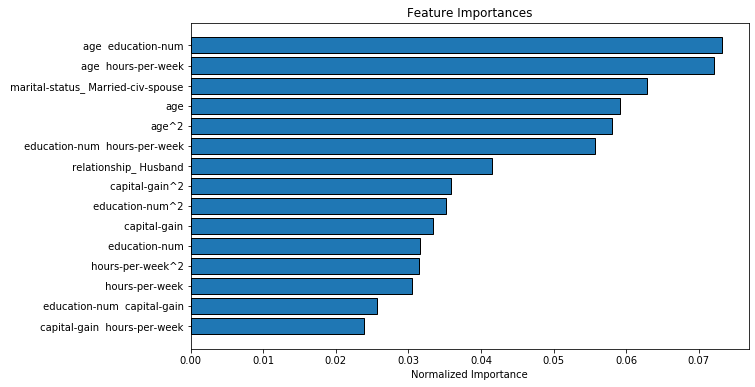

In [349]:
feature_importances_sorted = plot_feature_importances(feature_importances_poly)

In [350]:
#blending implementation
#data for level 1 training
train_data_model = train[0:10000].copy()
#data for level 2 training
train_data_blending = train[10000:].copy()
train_label_model = train_labels[0:10000].copy();
train_label_blending = train_labels[10000:].copy();
print(train_data_model.shape)
print(train_data_blending.shape)
print(train_label_model.shape)
print(train_label_blending.shape)

(10000, 102)
(17561, 102)
(10000,)
(17561,)


In [351]:
from sklearn.neighbors import KNeighborsClassifier
#knn model
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(train_data_model,train_label_model)

knn_pred = knnModel.predict_proba(train_data_blending)[:, 1]
knn_pred[1:5]

array([0.2, 0.4, 0.8, 0.2])

In [352]:
from sklearn.svm import SVC
#svm model
svcModel = SVC(C=8, gamma='auto', probability=True)
svcModel.fit(train_data_model,train_label_model) 

svc_pred = svcModel.predict_proba(train_data_blending)[:, 1]
svc_pred[1:5]

array([0.15930164, 0.22256346, 0.63993176, 0.19832414])

In [353]:
from sklearn.ensemble import GradientBoostingClassifier
#gbdt model
gbdtModel = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbdtModel.fit(train_data_model, train_label_model)  

gbdt_pred = gbdtModel.predict_proba(train_data_blending)[:, 1]
gbdt_pred[1:5]   


array([0.02870519, 0.3887898 , 0.56549518, 0.14329851])

In [354]:
#random forest model
forestModel = RandomForestClassifier(n_estimators = 200,random_state=50)
forestModel.fit(train_data_model, train_label_model)

forest_pred = forestModel.predict_proba(train_data_blending)[:, 1]
forest_pred[1:5] 

array([0.0475    , 0.09466667, 0.675     , 0.16      ])

In [355]:
#training data for level 2 model
composite_feature = np.vstack((knn_pred, svc_pred, gbdt_pred, forest_pred)).T;
composite_feature.shape

(17561, 4)

In [356]:
#level 2 model training
log_reg_composite = LogisticRegression(C = 1.0)
log_reg_composite.fit(composite_feature, train_label_blending)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [357]:
#training all the level 1 models with full training data
knnModel_composite = KNeighborsClassifier(n_neighbors=5)
knnModel_composite.fit(train,train_labels)

svcModel_composite = SVC(C=8, gamma='auto', probability=True)
svcModel_composite.fit(train,train_labels)

gbdtModel_composite = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbdtModel_composite.fit(train, train_labels)

forestModel_composite = RandomForestClassifier(n_estimators = 200,random_state=50)
forestModel_composite.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [358]:
#perform transform to test data with level 1 model, used as input for level 2 model predicting
knn_pred_composite = knnModel_composite.predict_proba(test)[:, 1]
svc_pred_composite = svcModel_composite.predict_proba(test)[:, 1]
gdbt_pred_composite = gbdtModel_composite.predict_proba(test)[:, 1]
forest_pred_composite = forestModel_composite.predict_proba(test)[:, 1]
composite_feature_blending = np.vstack((knn_pred_composite, svc_pred_composite, gdbt_pred_composite, forest_pred_composite)).T;
composite_feature_blending.shape

(5000, 4)

In [359]:
#predict on test data with level 2 model
log_reg_composite_pred = log_reg_composite.predict_proba(composite_feature_blending)[:, 1]

In [360]:
print(roc_auc_score(test_target, log_reg_composite_pred))
pred_target_composite = log_reg_composite_pred.copy()
pred_target_composite[pred_target_composite >= 0.5] = 1
pred_target_composite[pred_target_composite < 0.5] = 0
print(accuracy_score(test_target, pred_target_composite))
print(precision_score(test_target, pred_target_composite))
print(recall_score(test_target, pred_target_composite))
print(f1_score(test_target, pred_target_composite))

0.9258573816328426
0.8698
0.7864838393731636
0.6496763754045307
0.7115640230394328


In [230]:
#stacking of basic models
from sklearn.model_selection import KFold
kfold= KFold(n_splits=5,random_state =None)
knn_valid_result = np.zeros(shape=(27561))
knnModel_for_model_i = [None]*5
i = 0
for train_index,valid_index in kfold.split(train,train_labels):
    train_features_for_model_i, train_labels_for_model_i = train[train_index], train_labels[train_index]
    valid_features_for_model_i, valid_labels_for_model_i = train[valid_index], train_labels[valid_index]
    
    knnModel_for_model_i[i] = KNeighborsClassifier(n_neighbors=5)
    knnModel_for_model_i[i].fit(train_features_for_model_i,train_labels_for_model_i)

    knn_valid_result[valid_index] = knnModel_for_model_i[i].predict_proba(valid_features_for_model_i)[:, 1]
    i = i + 1

In [231]:
svc_valid_result = np.zeros(shape=(27561))
svcModel_for_model_i = [None]*5
i = 0
for train_index,valid_index in kfold.split(train,train_labels):
    train_features_for_model_i, train_labels_for_model_i = train[train_index], train_labels[train_index]
    valid_features_for_model_i, valid_labels_for_model_i = train[valid_index], train_labels[valid_index]
    
    svcModel_for_model_i[i] = SVC(C=8, gamma='auto', probability=True)
    svcModel_for_model_i[i].fit(train_features_for_model_i,train_labels_for_model_i)

    svc_valid_result[valid_index] = svcModel_for_model_i[i].predict_proba(valid_features_for_model_i)[:, 1]
    i = i+1

In [233]:
gbdt_valid_result = np.zeros(shape=(27561))
gbdtModel_for_model_i = [None]*5
i = 0
for train_index,valid_index in kfold.split(train,train_labels):
    train_features_for_model_i, train_labels_for_model_i = train[train_index], train_labels[train_index]
    valid_features_for_model_i, valid_labels_for_model_i = train[valid_index], train_labels[valid_index]
    
    gbdtModel_for_model_i[i] = GradientBoostingClassifier(n_estimators=200, random_state=0)
    gbdtModel_for_model_i[i].fit(train_features_for_model_i,train_labels_for_model_i)

    gbdt_valid_result[valid_index] = gbdtModel_for_model_i[i].predict_proba(valid_features_for_model_i)[:, 1]
    
    i = i+1

In [234]:
forest_valid_result = np.zeros(shape=(27561))
forestModel_for_model_i = [None]*5
i = 0
for train_index,valid_index in kfold.split(train,train_labels):
    train_features_for_model_i, train_labels_for_model_i = train[train_index], train_labels[train_index]
    valid_features_for_model_i, valid_labels_for_model_i = train[valid_index], train_labels[valid_index]
    
    forestModel_for_model_i[i] = RandomForestClassifier(n_estimators = 200,random_state=50)
    forestModel_for_model_i[i].fit(train_features_for_model_i,train_labels_for_model_i)

    forest_valid_result[valid_index] = forestModel_for_model_i[i].predict_proba(valid_features_for_model_i)[:, 1] 
    i = i+1

In [238]:
train_for_level2_model = np.vstack((knn_valid_result,svc_valid_result,gbdt_valid_result,forest_valid_result)).T
log_reg_level2 = LogisticRegression(C = 1.0)
log_reg_level2.fit(train_for_level2_model, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [239]:
knn_test_level2 = np.zeros(shape=(test.shape[0]))
for i in range(len(knnModel_for_model_i)):
    knn_test_level2 = knn_test_level2 + knnModel_for_model_i[i].predict_proba(test)[:, 1]
    
knn_test_level2 = knn_test_level2/len(knnModel_for_model_i)


svc_test_level2 = np.zeros(shape=(test.shape[0]))
for i in range(len(svcModel_for_model_i)):
    svc_test_level2 = svc_test_level2 + svcModel_for_model_i[i].predict_proba(test)[:, 1]
    
svc_test_level2 = svc_test_level2/len(svcModel_for_model_i)


gbdt_test_level2 = np.zeros(shape=(test.shape[0]))
for i in range(len(gbdtModel_for_model_i)):
    gbdt_test_level2 = gbdt_test_level2 + gbdtModel_for_model_i[i].predict_proba(test)[:, 1]
    
gbdt_test_level2 = gbdt_test_level2/len(gbdtModel_for_model_i)


forest_test_level2 = np.zeros(shape=(test.shape[0]))
for i in range(len(knnModel_for_model_i)):
    forest_test_level2 = forest_test_level2 + forestModel_for_model_i[i].predict_proba(test)[:, 1]
    
forest_test_level2 = forest_test_level2/len(forestModel_for_model_i)

In [240]:
test_for_level2_model = np.vstack((knn_test_level2,svc_test_level2,gbdt_test_level2,forest_test_level2)).T
log_reg_level2_pred = log_reg_level2.predict_proba(test_for_level2_model)[:, 1]

print(roc_auc_score(test_target, log_reg_level2_pred))
pred_target_level2 = log_reg_level2_pred.copy()
pred_target_level2[pred_target_level2 >= 0.5] = 1
pred_target_level2[pred_target_level2 < 0.5] = 0
print(accuracy_score(test_target, pred_target_level2))
print(precision_score(test_target, pred_target_level2))
print(recall_score(test_target, pred_target_level2))
print(f1_score(test_target, pred_target_level2))

0.9262812576306275
0.871
0.7833173537871524
0.6610032362459547
0.7169811320754716


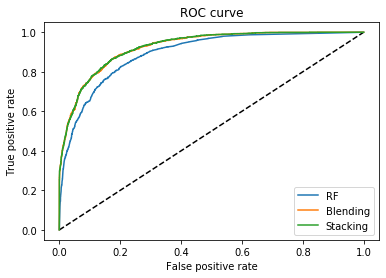

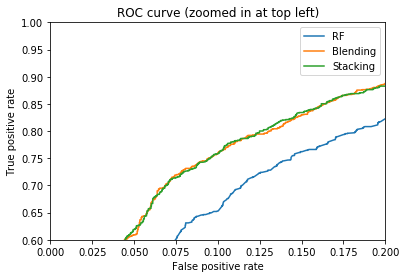

In [246]:
from sklearn import metrics
#plot the roc curve
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(test_target, predictions)
fpr_blending, tpr_blending, thresholds_blending = metrics.roc_curve(test_target, log_reg_composite_pred)
fpr_stacking, tpr_stacking, thresholds_stacking = metrics.roc_curve(test_target, log_reg_level2_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_blending, tpr_blending, label='Blending')
plt.plot(fpr_stacking, tpr_stacking, label='Stacking')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#zoom in the upper-left
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_blending, tpr_blending, label='Blending')
plt.plot(fpr_stacking, tpr_stacking, label='Stacking')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

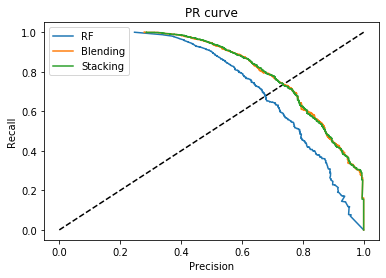

In [248]:
#plot the PR curve
p_rf, r_rf, thresholds_rf = metrics.precision_recall_curve(test_target, predictions)
p_blending, r_blending, thresholds_blending = metrics.precision_recall_curve(test_target, log_reg_composite_pred)
p_stacking, r_stacking, thresholds_stacking = metrics.precision_recall_curve(test_target, log_reg_level2_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(p_rf, r_rf, label='RF')
plt.plot(p_blending, r_blending, label='Blending')
plt.plot(p_stacking, r_stacking, label='Stacking')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('PR curve')
plt.legend(loc='best')
plt.show()
